In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("dim_customers.csv")

In [ ]:
# Load the second CSV file into another DataFrame
df2 = pd.read_csv('fact_spends.csv')

# Merge the two DataFrames based on the common primary key
merged_df = pd.merge(df1, df2, on='customer_id')

print(merged_df)

       customer_id age_group       city             occupation gender  \
0       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
1       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
2       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
3       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
4       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
...            ...       ...        ...                    ...    ...   
863995  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863996  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863997  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863998  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863999  ATQCUS3477     25-34     Mumbai        Business Owners   Male   

       marital status  avg_income      month           category payment_type  \
0             Married       73523        Ma

In [ ]:
merged_df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


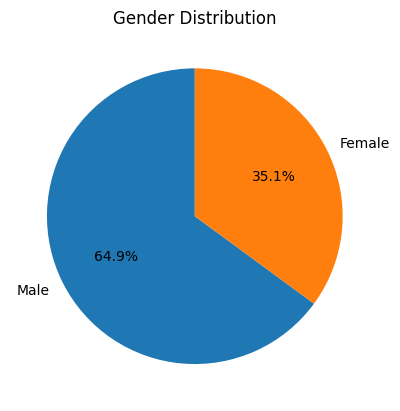

In [ ]:
# prompt: pie chart of gender

gender_counts = merged_df['gender'].value_counts()

fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
ax.set_title("Gender Distribution")

plt.show()


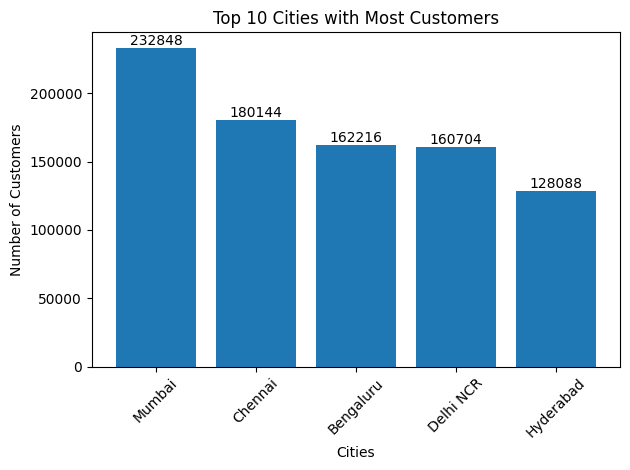

In [ ]:
# prompt: cities in bar chart with data lables

cities_counts = merged_df['city'].value_counts()[:10]

fig, ax = plt.subplots()
ax.bar(cities_counts.index, cities_counts.values)
ax.set_title("Top 10 Cities with Most Customers")
ax.set_xlabel("Cities")
ax.set_ylabel("Number of Customers")

for i, value in enumerate(cities_counts.values):
  ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


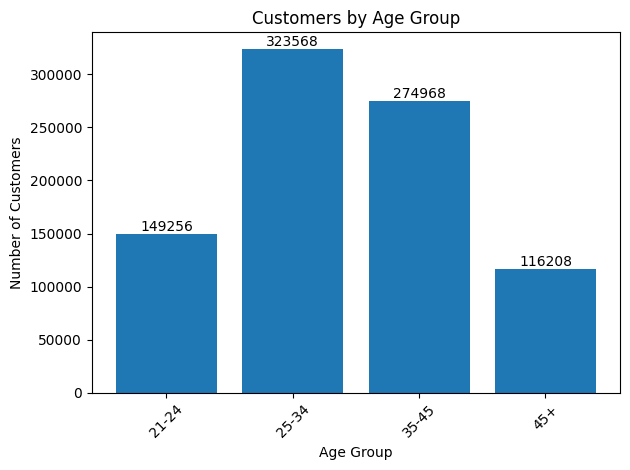

In [ ]:
# prompt: bar graph with age group

age_group = merged_df.groupby('age_group').size().reset_index(name='count')

fig, ax = plt.subplots()
ax.bar(age_group['age_group'], age_group['count'])
ax.set_title("Customers by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Customers")

for i, value in enumerate(age_group['count']):
  ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


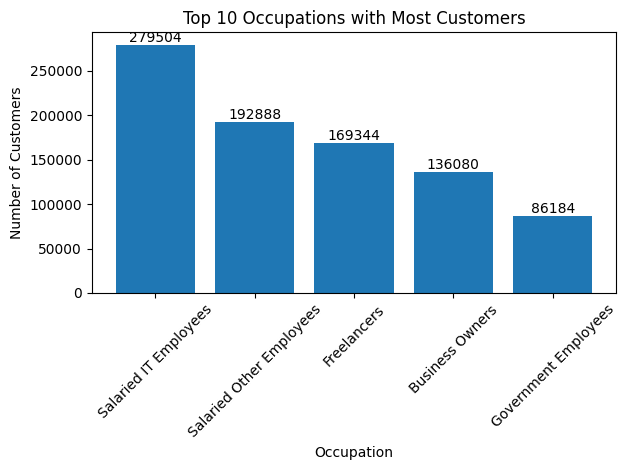

In [ ]:
# prompt: bar graph by occupation

occupation_counts = merged_df['occupation'].value_counts()[:10]

fig, ax = plt.subplots()
ax.bar(occupation_counts.index, occupation_counts.values)
ax.set_title("Top 10 Occupations with Most Customers")
ax.set_xlabel("Occupation")
ax.set_ylabel("Number of Customers")

for i, value in enumerate(occupation_counts.values):
  ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


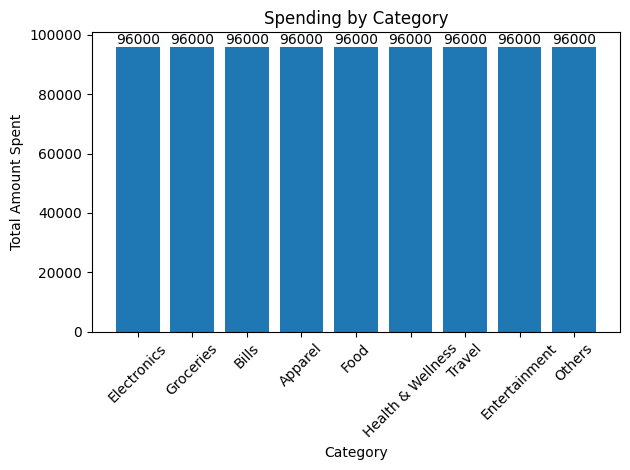

In [ ]:
# prompt: Bar graph for category

category_counts = merged_df['category'].value_counts()

fig, ax = plt.subplots()
ax.bar(category_counts.index, category_counts.values)
ax.set_title("Spending by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Total Amount Spent")

for i, value in enumerate(category_counts.values):
  ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


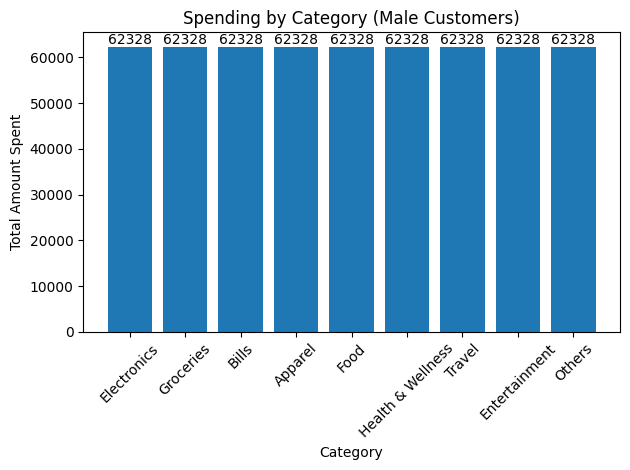

In [ ]:
# prompt: bar graph how many male are spending their money on  which category

male_df = merged_df[merged_df['gender'] == 'Male']
category_counts = male_df['category'].value_counts()

fig, ax = plt.subplots()
ax.bar(category_counts.index, category_counts.values)
ax.set_title("Spending by Category (Male Customers)")
ax.set_xlabel("Category")
ax.set_ylabel("Total Amount Spent")

for i, value in enumerate(category_counts.values):
  ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


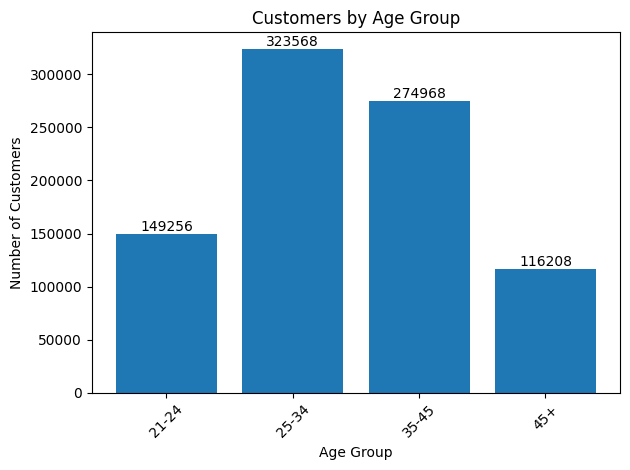

In [ ]:
# prompt: make a bar chart for age_group specific from the data dont't use category

age_group_counts = merged_df.groupby('age_group').size().reset_index(name='count')

fig, ax = plt.subplots()
ax.bar(age_group_counts['age_group'], age_group_counts['count'])
ax.set_title("Customers by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Customers")

for i, value in enumerate(age_group_counts['count']):
  ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: make a code to find average spend and store it into the avg_spends and make a new coloum in data named avg_spends

# Calculate average spend per customer
avg_spends = merged_df.groupby('customer_id')['spend'].mean().reset_index(name='avg_spend')

# Add the avg_spend column to the merged_df
merged_df = pd.merge(merged_df, avg_spends, on='customer_id')

# Print the merged_df with the new column
print(merged_df)


       customer_id age_group       city             occupation gender  \
0       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
1       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
2       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
3       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
4       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
...            ...       ...        ...                    ...    ...   
863995  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863996  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863997  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863998  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863999  ATQCUS3477     25-34     Mumbai        Business Owners   Male   

       marital status  avg_income      month           category payment_type  \
0             Married       73523        Ma

In [ ]:
merged_df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,avg_spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,900.018519
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,900.018519
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,900.018519
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,900.018519
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,900.018519


In [ ]:
# prompt:  Find the average income utilisation % of customers (avg_spends/avg_income)

merged_df['income_utilisation_percent'] = (merged_df['avg_spend'] / merged_df['avg_income']) * 100

# Print the merged_df with the new column
print(merged_df)

merged_df.head()


       customer_id age_group       city             occupation gender  \
0       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
1       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
2       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
3       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
4       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
...            ...       ...        ...                    ...    ...   
863995  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863996  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863997  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863998  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863999  ATQCUS3477     25-34     Mumbai        Business Owners   Male   

       marital status  avg_income      month           category payment_type  \
0             Married       73523        Ma

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,avg_spend,income_utilisation_percent
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,900.018519,1.224132
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,900.018519,1.224132
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,900.018519,1.224132
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,900.018519,1.224132
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,900.018519,1.224132


In [ ]:
# prompt: covert income_utilisation_percent column into percentage

merged_df['income_utilisation_percent'] = pd.Series(["{0:.2f}%".format(val) for val in merged_df['income_utilisation_percent']])


In [ ]:
merged_df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,avg_spend,income_utilisation_percent
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,900.018519,1.22%
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,900.018519,1.22%
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,900.018519,1.22%
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,900.018519,1.22%
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,900.018519,1.22%


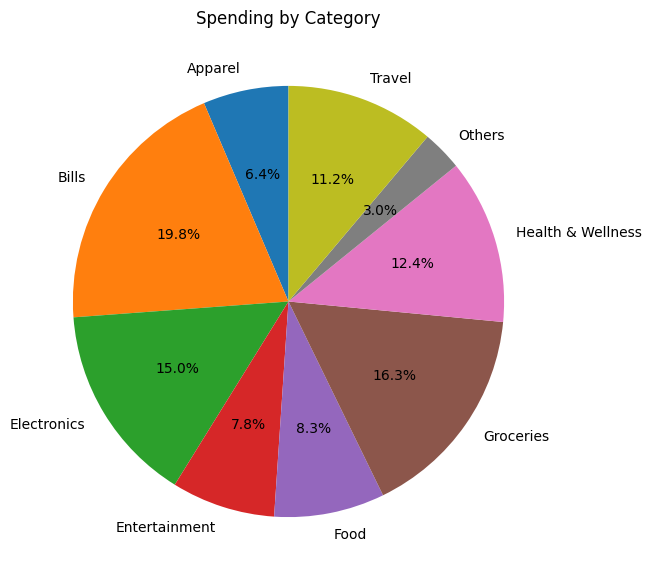

In [ ]:
# prompt: make a code to sumif of spend according to category and make a pie chart of all category in decending order with total value of spend in percent

import pandas as pd

# Create a pivot table to sum the spend for each category
pivot_table = pd.pivot_table(merged_df, values='spend', index='category', aggfunc=sum).sort_values(by='spend', ascending=False)

# Calculate the total spend
total_spend = pivot_table['spend'].sum()

# Calculate the percentage of spend for each category
pivot_table['spend_percent'] = (pivot_table['spend'] / total_spend) * 100

# Format the spend_percent column as a percentage
pivot_table['spend_percent'] = pd.Series(["{0:.2f}%".format(val) for val in pivot_table['spend_percent']])

# Create a pie chart of the spend by category
plt.figure(figsize=(12, 8))
plt.pie(pivot_table['spend'], labels=pivot_table['spend_percent'], autopct="%1.1f%%", startangle=90)
plt.title("Spend by Category")
plt.axis('equal')
plt.show()


MessageError: Error: credential propagation was unsuccessful